# PREDICTING WINE QUALITY WITH RANDOM FOREST AND SCIKIT-LEARN

## Task 1. Getting Started and Working with Google Colaboratory

- Rhyme: Coursera's hands-on project platform  
- Virtual Browser  
- Google Colaboratory: write and execute Python code in a Jupyter Notebook  

## Task 2. Defining Problem, Importing Libraries and Downloading Data

### 2.1 Define Problem

**Objective:** Modeling Wine Quality based on its physicochemical attributes.  

**List of attributes:**
- fixed acidity  
- volatile acidity  
- citric acid	
- residual sugar	
- chlorides	
- free sulfur dioxide	
- total sulfur dioxide	
- density	
- pH	
- sulphates	
- alcohol   

**Quality:** Categorical levels from 3 to 8.

**Data:**
- There are two datasets related to red and white variants of the Portuguese "Vinho Verde" wine.
- In this project we only use red wine dataset.
- Datasets are available at [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/wine+quality) and [Paulo Cortez's web page](http://www3.dsi.uminho.pt/pcortez/wine/).    

**Acknowledgements:**   
Thanks for the assistance I received by using the *UCI Machine Learning Repository*.  
Dua, D. and Graff, C. (2019). [UCI Machine Learning Repository](http://archive.ics.uci.edu/ml). Irvine, CA: University of California, School of Information and Computer Science.

**Relevant paper:**  
[1] P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. *Modeling wine preferences by data mining from physicochemical properties*. In Decision Support Systems, Elsevier, 47(4):547-553, 2009. Available [here](http://dx.doi.org/10.1016/j.dss.2009.05.016).

### 2.2 Libraries

In [1]:
%matplotlib inline

import pandas as pd               # package for data analysis and manipulation 
import numpy as np                # package for scientific computing on multidimensional arrays 
import matplotlib                 # package for creating visualizations
from matplotlib import pyplot as plt
import seaborn as sns             # data visualization library based on matplotlib
import sklearn                    # machine learning library
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
from sklearn.inspection import permutation_importance
from sklearn.calibration import CalibratedClassifierCV
from sklearn.model_selection import GridSearchCV, StratifiedKFold
import scipy                      # library for mathematics, science and engineering
from scipy.stats import spearmanr
from scipy.cluster import hierarchy
import collections
import zipfile
import requests
import platform

# Check Python version
print('Python', platform.python_version())

# Check the version of packages
for package in [pd, np, matplotlib, sns, sklearn, scipy, requests, platform]:
    print (package.__name__, package.__version__)

Python 3.8.8
pandas 1.2.4
numpy 1.20.1
matplotlib 3.3.4
seaborn 0.11.1
sklearn 0.24.1
scipy 1.6.2
requests 2.25.1
platform 1.0.8


In [2]:
# Remove the max column restriction for displaying on the screen
pd.options.display.max_columns = None

### 2.3 Data

In [3]:
url1 = 'http://www3.dsi.uminho.pt/pcortez/wine/winequality.zip'
url2 = 'https://drive.google.com/uc?id=1dAb2OalBSblCop9UbGjiv9qnS3N-3Kuw'
file = 'raw_data.zip'

In [4]:
try:
    with requests.Session() as s:
        response = s.get(url1)
    open(file, 'wb').write(response.content)
    print('Sucessful download from url 1\n')
except:
    with requests.Session() as s:
        response = s.get(url2)
    open(file, 'wb').write(response.content)
    print('Sucessful download from url 2\n')

zip_file = zipfile.ZipFile(file, mode='r')
zip_file.printdir()

Sucessful download from url 1

File Name                                             Modified             Size
winequality/winequality-names.txt              2009-10-07 15:52:54         2838
winequality/winequality-names.txt.bak          2009-10-07 15:52:28         2838
winequality/winequality-red.csv                2009-06-26 17:45:52        84199
winequality/winequality-white.csv              2009-06-26 17:47:46       264426


In [5]:
path = 'winequality/winequality-red.csv' 

wine_csv = zip_file.open(path, mode='r')

# print some lines of red wine file
wine_csv.readlines(300)

[b'"fixed acidity";"volatile acidity";"citric acid";"residual sugar";"chlorides";"free sulfur dioxide";"total sulfur dioxide";"density";"pH";"sulphates";"alcohol";"quality"\n',
 b'7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5\n',
 b'7.8;0.88;0;2.6;0.098;25;67;0.9968;3.2;0.68;9.8;5\n',
 b'7.8;0.76;0.04;2.3;0.092;15;54;0.997;3.26;0.65;9.8;5\n']

In [6]:
wine_csv.seek(0)
wine = pd.read_csv(wine_csv, sep=';')
wine_csv.close()

print('Shape of wine =', wine.shape)
print('Number of rows = {}, Number of columns = {}'.format(wine.shape[0], wine.shape[1]))
wine.head(10)

Shape of wine = (1599, 12)
Number of rows = 1599, Number of columns = 12


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


## Task 3. Cleaning Data

### 3.1 Rename and change the order of columns

In [7]:
wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [8]:
wine.columns = wine.columns.str.replace(' ', '_')
wine.head(1)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [9]:
wine.columns.get_loc('quality'), wine.columns.get_loc('alcohol')

(11, 10)

In [10]:
new_order = [11, 10] + list(range(10))
wine = wine[wine.columns[new_order]]
wine.head(1)

,quality,alcohol,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates
0,5,9.4,7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56


### 3.2 Remove duplicates

In [11]:
print('Number of row before removing duplicates =', wine.shape[0])
print('Duplicated rows:\n', wine.duplicated())
print('Number of duplicated rows =', wine.duplicated().sum())
wine.drop_duplicates(inplace=True)
wine.reset_index(drop=True, inplace=True)
print('Number of rows after removing duplicates =', len(wine))

Number of row before removing duplicates = 1599
Duplicated rows:
 0       False
1       False
2       False
3       False
4        True
        ...  
1594    False
1595    False
1596     True
1597    False
1598    False
Length: 1599, dtype: bool
Number of duplicated rows = 240
Number of rows after removing duplicates = 1359


In [12]:
wine_2 = wine.copy()
wine_2.drop('quality', axis=1, inplace=True)
print('Number of duplicated rows =', wine_2.duplicated().sum())

Number of duplicated rows = 0


### 3.3 Save .csv file to disk

In [13]:
wine.to_csv('red_wine.csv', index=False)

## Task 4. Performing Exploratory Data Analysis (part 1)

### 4.1 Statistics

In [14]:
print('Number of rows = {}, Number of columns = {}'.format(wine.shape[0], wine.shape[1]))
wine.head()

Number of rows = 1359, Number of columns = 12


,quality,alcohol,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates
0,5,9.4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56
1,5,9.8,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68
2,5,9.8,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65
3,6,9.8,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58
4,5,9.4,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56


In [15]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1359 entries, 0 to 1358
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   quality               1359 non-null   int64  
 1   alcohol               1359 non-null   float64
 2   fixed_acidity         1359 non-null   float64
 3   volatile_acidity      1359 non-null   float64
 4   citric_acid           1359 non-null   float64
 5   residual_sugar        1359 non-null   float64
 6   chlorides             1359 non-null   float64
 7   free_sulfur_dioxide   1359 non-null   float64
 8   total_sulfur_dioxide  1359 non-null   float64
 9   density               1359 non-null   float64
 10  pH                    1359 non-null   float64
 11  sulphates             1359 non-null   float64
dtypes: float64(11), int64(1)
memory usage: 127.5 KB


In [16]:
wine.isna().sum().sum()

0

In [ ]:
wine.quality.value_counts()

5    577
6    535
7    167
4     53
8     17
3     10
Name: quality, dtype: int64

In [17]:
wine.describe()

,quality,alcohol,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates
count,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000
mean,5.623252,10.432315,8.310596,0.529478,0.272333,2.523400,0.088124,15.893304,46.825975,0.996709,3.309787,0.658705
std,0.823578,1.082065,1.736990,0.183031,0.195537,1.352314,0.049377,10.447270,33.408946,0.001869,0.155036,0.170667
min,3.000000,8.400000,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000
25%,5.000000,9.500000,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000
50%,6.000000,10.200000,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996700,3.310000,0.620000
75%,6.000000,11.100000,9.200000,0.640000,0.430000,2.600000,0.091000,21.000000,63.000000,0.997820,3.400000,0.730000
max,8.000000,14.900000,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000


### 4.2 Histogram of wine quality with 6 classes

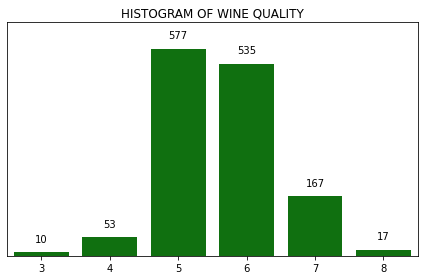

In [19]:
plt.figure(figsize=(6, 4))

ax = sns.countplot(x='quality', data=wine, color='green')
ax.set(title='HISTOGRAM OF WINE QUALITY', xlabel='', ylabel='', yticklabels=[])
ax.tick_params(left=False)
ax.set_ylim(0, 650)
for p in ax.patches:
    ax.annotate(p.get_height(), 
                xy=(p.get_x() + p.get_width() / 2, p.get_height()), 
                xytext = (0, 10),
                textcoords = 'offset points',
                ha = 'center', 
                size=10)

plt.tight_layout()

## Task 5. Performing Exploratory Data Analysis (part 2)

### 5.1 Histogram of wine quality with 2 classes

In [20]:
category_dic = {3:'bad', 4:'bad', 5:'bad', 6:'good', 7:'good', 8:'good'}
wine['quality2'] = wine.quality.map(category_dic)

wine.quality2.value_counts()

good    719
bad     640
Name: quality2, dtype: int64

In [21]:
np.round(wine.quality2.value_counts() / len(wine) * 100, 1)

good    52.9
bad     47.1
Name: quality2, dtype: float64

In [22]:
class_labels = ['bad', 'good'] # class labels for graphs
custom_palette = {'bad':'blue', 'good':'red',
                 0:'blue', 1:'red'}

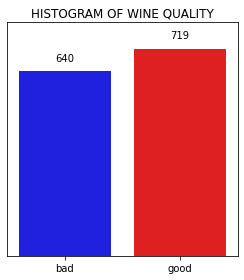

In [23]:
plt.figure(figsize=(3.5, 4))

ax = sns.countplot(x='quality2', data=wine, palette=custom_palette)
ax.set(title='HISTOGRAM OF WINE QUALITY', xlabel='', ylabel='', yticklabels=[])
ax.tick_params(left=False)
ax.set_ylim(0, 810)
for p in ax.patches:
    ax.annotate(p.get_height(), 
                xy=(p.get_x() + p.get_width() / 2, p.get_height()), 
                xytext = (0, 10),
                textcoords = 'offset points',
                ha = 'center', 
                size=10)

plt.tight_layout()

### 5.2 Violin plots

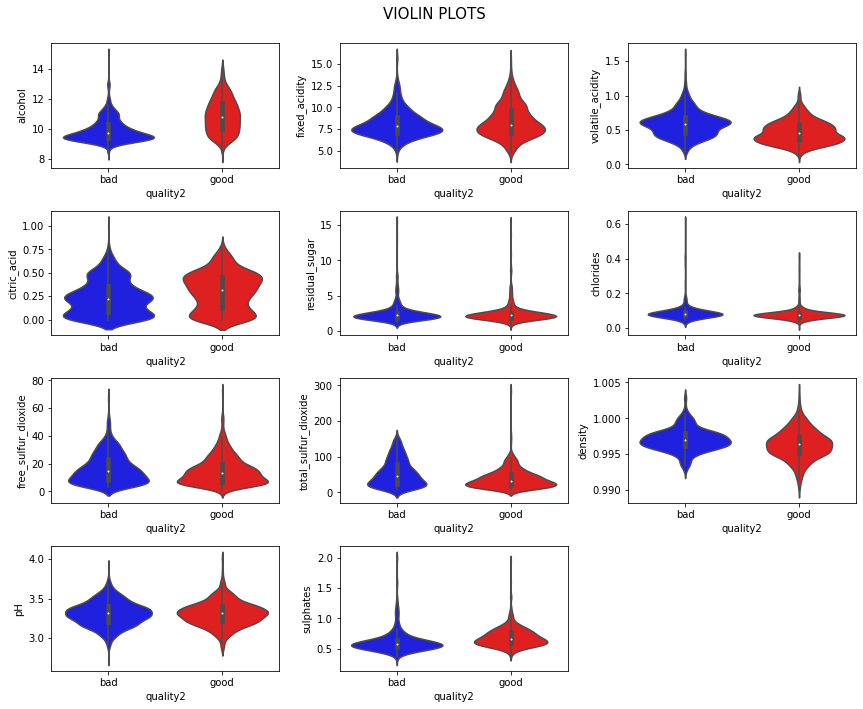

In [24]:
fig, axs = plt.subplots(4, 3, figsize=(12, 10))
fig.suptitle('VIOLIN PLOTS', fontsize=15)

column_names = wine.columns[1:12]
for i, column_name in enumerate(column_names):
    sns.violinplot(x='quality2', y=column_name, data=wine, ax=axs[i//3][i%3], palette=custom_palette)
    
axs[3][2].axis('off')
fig.tight_layout()
fig.subplots_adjust(top=0.93)

### 5.3 Correlation plots

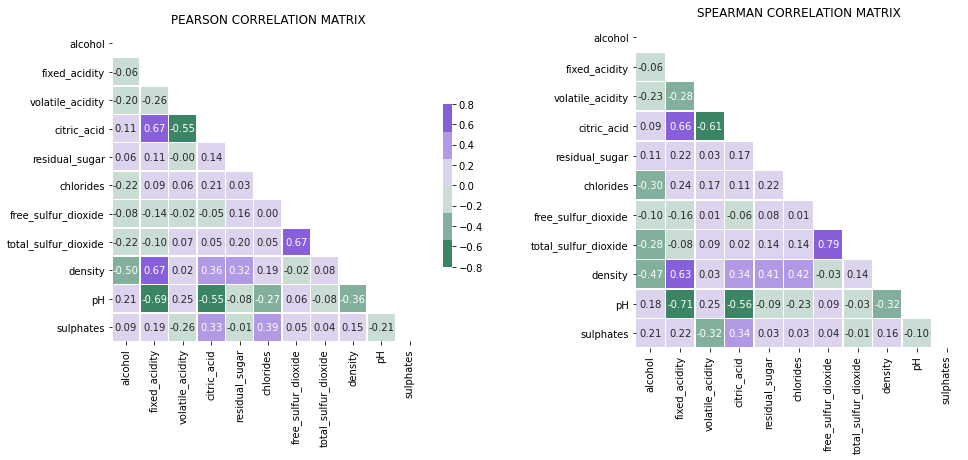

In [25]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,6.5))

pearson_corr = wine.iloc[:,1:12].corr(method='pearson')
spearman_corr = wine.iloc[:,1:12].corr(method='spearman')

mask = np.triu(np.ones_like(pearson_corr, dtype=bool), k=0)
cmap = sns.diverging_palette(150, 275)

sns.heatmap(pearson_corr, mask=mask, annot=True, fmt=',.2f', cmap=cmap, 
            cbar=True, cbar_kws={"shrink": .5}, square=True, linewidths=.5, 
            vmax=0.8, vmin=-0.8, center=0, ax=ax1)
ax1.set_title('PEARSON CORRELATION MATRIX')

sns.heatmap(spearman_corr, mask=mask, annot=True, fmt=',.2f', cmap=cmap, 
            cbar=False, square=True, linewidths=.5,
            vmax=0.8, vmin=-0.8, center=0, ax=ax2)
ax2.set_title('SPEARMAN CORRELATION MATRIX')

fig.tight_layout()

## Task 6. Generating Training, Validation and Testing Datasets

### 6.1 Define feature dataset and encode class labels

In [26]:
X = wine.iloc[:,1:12]

y = LabelEncoder().fit_transform(wine.quality2)
np.unique(y, return_counts=True)

(array([0, 1]), array([640, 719], dtype=int64))

In [27]:
class_dictionary = {'bad':0, 'good':1}
y = wine.quality2.map(class_dictionary)
y.value_counts(sort=False)

0    640
1    719
Name: quality2, dtype: int64

In [28]:
feature_names = np.array(X.columns)
print('Number of features =', len(feature_names))
print(feature_names)

Number of features = 11
['alcohol' 'fixed_acidity' 'volatile_acidity' 'citric_acid'
 'residual_sugar' 'chlorides' 'free_sulfur_dioxide' 'total_sulfur_dioxide'
 'density' 'pH' 'sulphates']


### 6.2 Generate training, validation and testing sets

In [29]:
# X_train - X_val - X_test
# 40 - 40 - 20

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=2**9, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, train_size=0.50, random_state=9**2, stratify=y_train)

In [30]:
print('Number of rows: y_train:{}, y_val:{}, y_test:{}, Total:{}'.format(len(y_train), len(y_val), len(y_test), len(y)))

print('\nDistribution by classes:')
pd.DataFrame({'train set':np.unique(y_train, return_counts=True)[1], 
              'validation set': np.unique(y_val, return_counts=True)[1], 
              'test set': np.unique(y_test, return_counts=True)[1]})

Number of rows: y_train:543, y_val:544, y_test:272, Total:1359

Distribution by classes:


,train set,validation set,test set
0,256,256,128
1,287,288,144


## Task 7. Creating a Data Visualizer

In [31]:
def print_outputs(X, X_train, X_val, X_test, y, y_train, y_val, y_test, clf,
                 title='CONFUSION MATRICES'):

    train_score = clf.score(X_train, y_train)
    val_score = clf.score(X_val, y_val)
    test_score = clf.score(X_test, y_test)

    print('   - Accuracy on training set = {:.2f}'.format(train_score))
    print('   - Accuracy on validation set = {:.2f}'.format(val_score))
    print('   - Accuracy on testing set = {:.2f}'.format(test_score))
    print('   - Total Accuracy = {:.2f}\n'.format(clf.score(X, y)))    

    y_train_predicted = clf.predict(X_train)
    y_val_predicted = clf.predict(X_val)
    y_test_predicted = clf.predict(X_test)
    
    confusion = []
    confusion.append(pd.DataFrame(confusion_matrix(y_train, y_train_predicted))) # train
    confusion.append(pd.DataFrame(confusion_matrix(y_val, y_val_predicted))) # validation
    confusion.append(pd.DataFrame(confusion_matrix(y_test, y_test_predicted))) # test

    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10, 3))
    fig.suptitle(title, fontsize=15)
    axs = [ax1, ax2, ax3]

    for i in range(3):
        sns.heatmap(confusion[i], annot=True, fmt=',.0f', cbar=False, cmap='YlGnBu', ax= axs[i])
        axs[i].set(xticklabels=class_labels, yticklabels=class_labels, xlabel='Predicted label', ylabel='True label')      

    ax1.set_title('Training accuracy = {:.2f}'.format(train_score))
    ax2.set_title('Validation accuracy = {:.2f}'.format(val_score))
    ax3.set_title('Testing accuracy = {:.2f}'.format(test_score))

    fig.tight_layout()
    fig.subplots_adjust(top=0.80)

## Task 8. Applying a Random Forest Classifier

### 8.1 Train classifier

   - Accuracy on training set = 1.00
   - Accuracy on validation set = 0.76
   - Accuracy on testing set = 0.73
   - Total Accuracy = 0.85



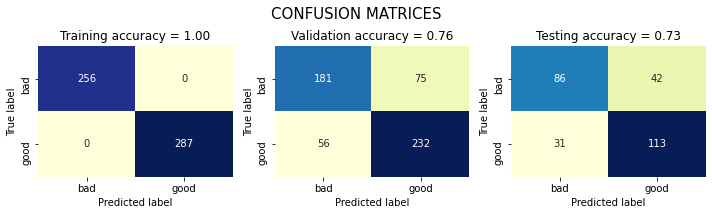

In [32]:
clf_0 = RandomForestClassifier(random_state=0)
clf_0.fit(X_train, y_train)

print_outputs(X, X_train, X_val, X_test, y, y_train, y_val, y_test, clf_0)

### 8.2 Calibrate classifier

   - Accuracy on training set = 1.00
   - Accuracy on validation set = 0.75
   - Accuracy on testing set = 0.75
   - Total Accuracy = 0.85



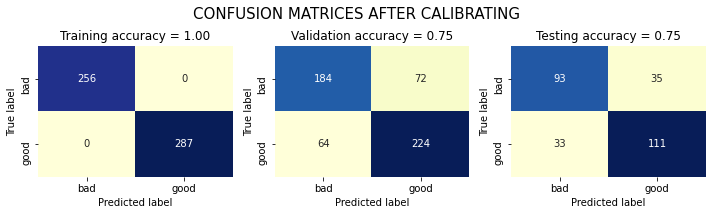

In [33]:
clf_0c = CalibratedClassifierCV(clf_0, method='sigmoid', cv='prefit')
clf_0c.fit(X_val, y_val)

print_outputs(X, X_train, X_val, X_test, y, y_train, y_val, y_test, clf_0c, title='CONFUSION MATRICES AFTER CALIBRATING')

### 8.3 Swap roles between training and validation datasets

Training classifier before clalibrating:
   - Accuracy on training set = 1.00
   - Accuracy on validation set = 0.74
   - Accuracy on testing set = 0.72
   - Total Accuracy = 0.84

Training classifier after calibrating:
   - Accuracy on training set = 1.00
   - Accuracy on validation set = 0.75
   - Accuracy on testing set = 0.74
   - Total Accuracy = 0.85



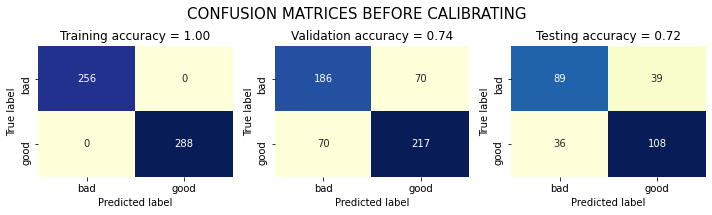

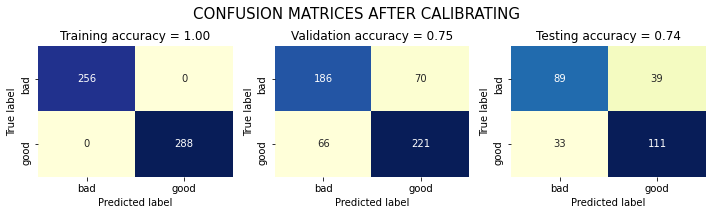

In [34]:
print('Training classifier before clalibrating:')
clf_1 = RandomForestClassifier(random_state=0)
clf_1.fit(X_val, y_val)
print_outputs(X, X_val, X_train, X_test, y, y_val, y_train, y_test, clf_1, title='CONFUSION MATRICES BEFORE CALIBRATING')

print('Training classifier after calibrating:')
clf_1c = CalibratedClassifierCV(clf_1, method='sigmoid', cv='prefit')
clf_1c.fit(X_train, y_train)
print_outputs(X, X_val, X_train, X_test, y, y_val, y_train, y_test, clf_1c, title='CONFUSION MATRICES AFTER CALIBRATING')

## Task 9. Analizing Random Forest Importances

<ipython-input-35-84f69270f4fc>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(feature_names[sorted_idx])


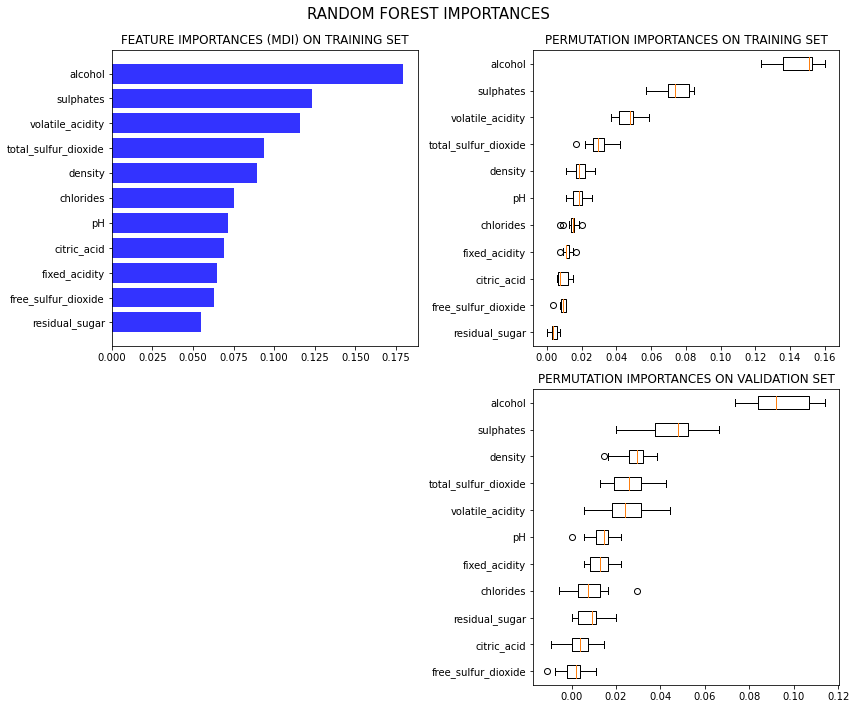

In [35]:
# clf_0 = RandomForestClassifier(random_state=0)
# clf_0.fit(X_train, y_train)

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 10))

fig.suptitle('RANDOM FOREST IMPORTANCES', fontsize=15)

feature_importances = clf_0.feature_importances_
sorted_idx = feature_importances.argsort()

y_ticks = np.arange(0, len(feature_names))
ax1.barh(y_ticks, feature_importances[sorted_idx], color='blue', alpha=0.8)
ax1.set_yticklabels(feature_names[sorted_idx])
ax1.set_yticks(y_ticks)
ax1.set_title("FEATURE IMPORTANCES (MDI) ON TRAINING SET")

permutation_train = permutation_importance(clf_0, X_train, y_train, n_repeats=15, random_state=7**4, n_jobs=-1)
sorted_idx = permutation_train.importances_mean.argsort()
#print(permutation_train.importances_mean[sorted_idx].T)
ax2.boxplot(permutation_train.importances[sorted_idx].T,
           vert=False, labels=feature_names[sorted_idx])
ax2.set_title('PERMUTATION IMPORTANCES ON TRAINING SET')

ax3.axis('off')

permutation_val = permutation_importance(clf_0, X_val, y_val, n_repeats=15, random_state=6**3, n_jobs=-1)
sorted_idx = permutation_val.importances_mean.argsort()

ax4.boxplot(permutation_val.importances[sorted_idx].T,
           vert=False, labels=feature_names[sorted_idx]) 

ax4.set_title('PERMUTATION IMPORTANCES ON VALIDATION SET')

fig.tight_layout()
fig.subplots_adjust(top=0.92)

## Task 10. Clustering Analysis

### 10.1 Compute Ward's minimum variance criterion

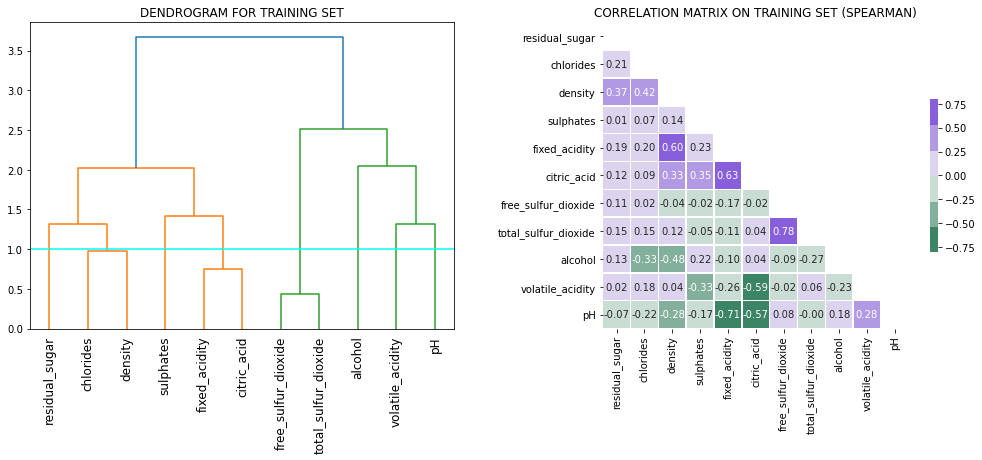

In [36]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6.5))
corr = spearmanr(X_train).correlation
corr_linkage = hierarchy.ward(corr)
dendro = hierarchy.dendrogram(
    corr_linkage, labels=feature_names, ax=ax1, leaf_rotation=90)
ax1.set_title('DENDROGRAM FOR TRAINING SET')
ax1.axhline(1, color='cyan')

corr_dendro = corr[dendro['leaves'], :][:, dendro['leaves']] #  cluster node j appears in position i in the left-to-right traversal of the leaves
mask = np.triu(np.ones_like(corr_dendro, dtype=bool), k=0) # Generate a mask for the upper triangle

sns.heatmap(corr_dendro, mask=mask, annot=True, fmt=',.2f', cmap=cmap, 
            cbar=True, cbar_kws={"shrink": .5}, square=True, linewidths=.5, 
            center=0, vmax=0.8, vmin=-0.8, ax=ax2)

ax2.set_title('CORRELATION MATRIX ON TRAINING SET (SPEARMAN)')
ax2.set_xticklabels(dendro['ivl'], rotation=90)
ax2.set_yticklabels(dendro['ivl'], rotation=0)

fig.tight_layout();

### 10.2 Select features from clusters

In [37]:
cluster_ids = hierarchy.fcluster(corr_linkage, t=1, criterion='distance')
the_dict = collections.defaultdict(list) #defaultdict is created with the values that are list.
for idx, cluster_id in enumerate(cluster_ids):
    the_dict[cluster_id].append(idx)
selected_features = [v[0] for v in the_dict.values()]
removed_features = [i for i in range(len(feature_names)) if i not in selected_features]
#removed_features = list(set(feature_names) - set(feature_names[selected_features]))

print('Number of selected features =', len(selected_features))
print('Selected features =', feature_names[selected_features].tolist())
print('Removed features =', feature_names[removed_features].tolist(), '\n')

Number of selected features = 8
Selected features = ['alcohol', 'fixed_acidity', 'volatile_acidity', 'residual_sugar', 'chlorides', 'free_sulfur_dioxide', 'pH', 'sulphates']
Removed features = ['citric_acid', 'total_sulfur_dioxide', 'density'] 



### 10.3 Train classifier with selected features

Training classifier before calibrating:
   - Accuracy on training set = 1.00
   - Accuracy on validation set = 0.73
   - Accuracy on testing set = 0.71
   - Total Accuracy = 0.83

Training classifier after calibrating:
   - Accuracy on training set = 1.00
   - Accuracy on validation set = 0.73
   - Accuracy on testing set = 0.71
   - Total Accuracy = 0.83



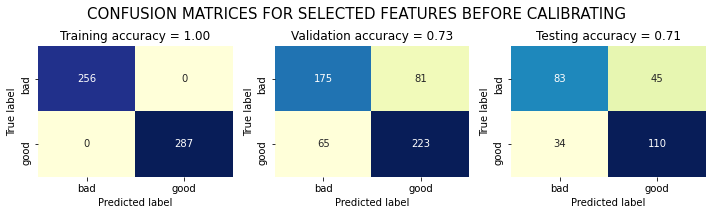

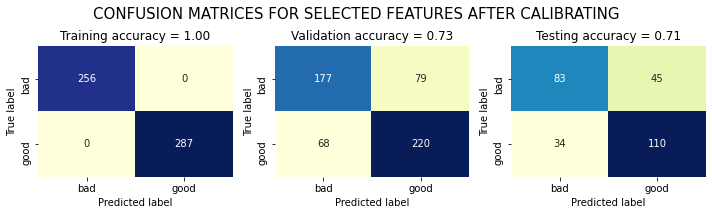

In [38]:
X_sel = X.iloc[:, selected_features]
X_train_sel = X_train.iloc[:, selected_features]
X_val_sel = X_val.iloc[:, selected_features]
X_test_sel = X_test.iloc[:, selected_features]

print('Training classifier before calibrating:')
clf_2 = RandomForestClassifier(random_state=0)
clf_2.fit(X_train_sel, y_train)
print_outputs(X_sel, X_train_sel, X_val_sel, X_test_sel, y, y_train, y_val, y_test, clf_2, 
             title='CONFUSION MATRICES FOR SELECTED FEATURES BEFORE CALIBRATING')

print('Training classifier after calibrating:')
clf_2c = CalibratedClassifierCV(clf_2, method='sigmoid', cv='prefit')
clf_2c.fit(X_val_sel, y_val)
print_outputs(X_sel, X_train_sel, X_val_sel, X_test_sel, y, y_train, y_val, y_test, clf_2c,
             title='CONFUSION MATRICES FOR SELECTED FEATURES AFTER CALIBRATING')

### 10.4 Train classifier with removed features

Training classifier before calibrating:
   - Accuracy on training set = 1.00
   - Accuracy on validation set = 0.63
   - Accuracy on testing set = 0.69
   - Total Accuracy = 0.79

Training classifier after calibrating:
   - Accuracy on training set = 1.00
   - Accuracy on validation set = 0.62
   - Accuracy on testing set = 0.68
   - Total Accuracy = 0.78



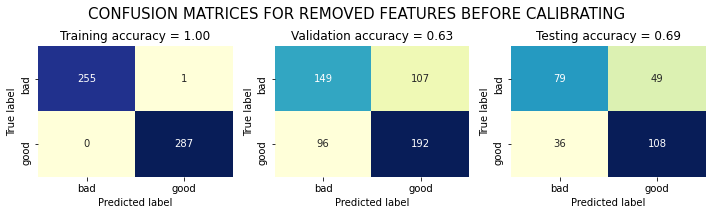

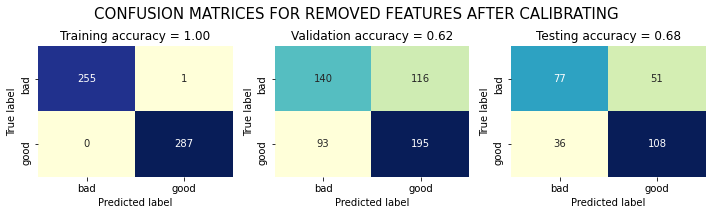

In [39]:
X_rem = X.iloc[:, removed_features]
X_train_rem = X_train.iloc[:, removed_features]
X_val_rem = X_val.iloc[:, removed_features]
X_test_rem = X_test.iloc[:, removed_features]

print('Training classifier before calibrating:')
clf_3 = RandomForestClassifier(random_state=0)
clf_3.fit(X_train_rem, y_train)
print_outputs(X_rem, X_train_rem, X_val_rem, X_test_rem, y, y_train, y_val, y_test, clf_3, 
             title='CONFUSION MATRICES FOR REMOVED FEATURES BEFORE CALIBRATING')

print('Training classifier after calibrating:')
clf_3c = CalibratedClassifierCV(clf_3, method='sigmoid', cv='prefit')
clf_3c.fit(X_val_rem, y_val)
print_outputs(X_rem, X_train_rem, X_val_rem, X_test_rem, y, y_train, y_val, y_test, clf_3c,
             title='CONFUSION MATRICES FOR REMOVED FEATURES AFTER CALIBRATING')

## Task 11. Performing Hyperparameter Tuning

Best parameters found by grid search are:
 {'class_weight': 'balanced_subsample', 'max_depth': 5, 'max_features': 2, 'n_estimators': 100}

Best cross validation score = 0.7607973253377573
   - Accuracy on training set = 0.81
   - Accuracy on validation set = 0.81
   - Accuracy on testing set = 0.72
   - Total Accuracy = 0.79



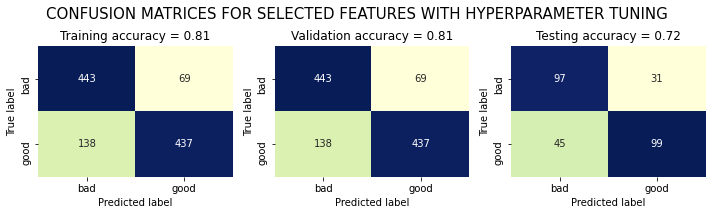

In [ ]:
param_grid = {
    'n_estimators' : [50, 75, 100],    # The number of trees in the forest, default=100
    'max_features' : [2, 5],           # The number of features to consider when looking for the best split, default=sqrt(n_features)
    'max_depth'    : [3, 5, 7],        # The maximum depth of the tree, default=None
    'class_weight' : [None, 'balanced', 'balanced_subsample'] # Used to associate weights with classes, default=None
}

X_train_2 = pd.concat([X_train_sel, X_val_sel], ignore_index=True)
y_train_2 = pd.concat([y_train, y_val], ignore_index=True)

clf_4 = RandomForestClassifier(random_state=0)
skf = StratifiedKFold(n_splits=3, random_state=5**5, shuffle=True)
clf_grid = GridSearchCV(clf_4, param_grid, cv=skf, n_jobs=-1)
clf_grid.fit(X_train_2, y_train_2)
print('Best parameters found by grid search are:\n', clf_grid.best_params_)
print('\nBest cross validation score =', clf_grid.best_score_)

print_outputs(X_sel, X_train_2, X_train_2, X_test_sel, y, y_train_2, y_train_2, y_test, clf_grid.best_estimator_, 
                 title='CONFUSION MATRICES FOR SELECTED FEATURES WITH HYPERPARAMETER TUNING')